## NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


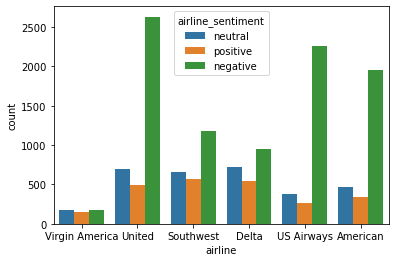

In [3]:
sns.countplot(data=df, x="airline", hue="airline_sentiment");

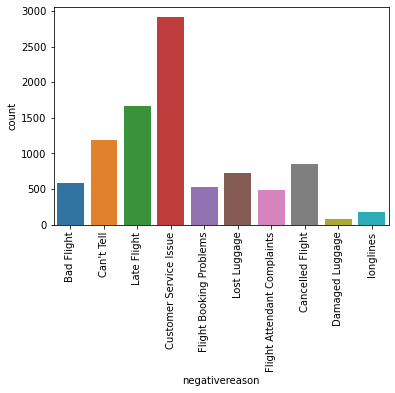

In [4]:
sns.countplot(data=df, x="negativereason")
plt.xticks(rotation=90);

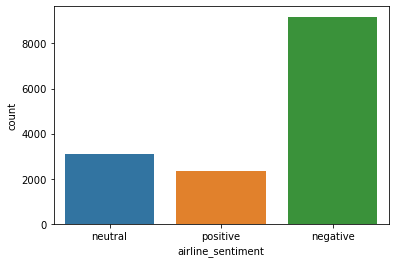

In [5]:
sns.countplot(data=df, x="airline_sentiment");

In [6]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Cleaning Data and Removing Rare Words

In [7]:
df2 = df.copy()

In [8]:
df2["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [10]:
df2["text"] = df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))
df2["text"]

<ipython-input-10-7958d95ae157>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["text"] = df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))


0                                              What  said.
1         plus you've added commercials to the experien...
2         I didn't today... Must mean I need to take an...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
                               ...                        
14635     thank you we got on a different flight to Chi...
14636     leaving over 20 minutes Late Flight. No warni...
14637      Please bring American Airlines to #BlackBerry10
14638     you have my money, you change my flight, and ...
14639     we have 8 ppl so we need 2 know how many seat...
Name: text, Length: 14640, dtype: object

In [11]:
" ".join(df2["text"]).split()

['What',
 'said.',
 'plus',
 "you've",
 'added',
 'commercials',
 'to',
 'the',
 'experience...',
 'tacky.',
 'I',
 "didn't",
 'today...',
 'Must',
 'mean',
 'I',
 'need',
 'to',
 'take',
 'another',
 'trip!',
 "it's",
 'really',
 'aggressive',
 'to',
 'blast',
 'obnoxious',
 '"entertainment"',
 'in',
 'your',
 "guests'",
 'faces',
 '&amp;',
 'they',
 'have',
 'little',
 'recourse',
 'and',
 "it's",
 'a',
 'really',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'seriously',
 'would',
 'pay',
 '$30',
 'a',
 'flight',
 'for',
 'seats',
 'that',
 "didn't",
 'have',
 'this',
 'playing.',
 "it's",
 'really',
 'the',
 'only',
 'bad',
 'thing',
 'about',
 'flying',
 'VA',
 'yes,',
 'nearly',
 'every',
 'time',
 'I',
 'fly',
 'VX',
 'this',
 '“ear',
 'worm”',
 'won’t',
 'go',
 'away',
 ':)',
 'Really',
 'missed',
 'a',
 'prime',
 'opportunity',
 'for',
 'Men',
 'Without',
 'Hats',
 'parody,',
 'there.',
 'https://t.co/mWpG7grEZP',
 'Well,',
 'I',
 "didn't…but",
 'NOW',
 'I',
 'DO!',
 ':-D',
 'it

In [12]:
pd.Series(" ".join(df2["text"]).split()).value_counts()

to                8535
the               5782
I                 5054
a                 4359
for               3921
                  ... 
change/massive       1
#ripskymall          1
#OneLove             1
ding!!               1
1101                 1
Length: 29092, dtype: int64

In [13]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

to                8535
the               5782
I                 5054
a                 4359
for               3921
                  ... 
change/massive       1
#ripskymall          1
#OneLove             1
ding!!               1
1101                 1
Length: 29092, dtype: int64

In [14]:
rare_words[rare_words < 2]

award?              1
trend.              1
days........none    1
#PIT                1
#UA3785             1
                   ..
change/massive      1
#ripskymall         1
#OneLove            1
ding!!              1
1101                1
Length: 19032, dtype: int64

In [15]:
rare_words = rare_words[rare_words < 2]

In [16]:
rare_words.index

Index(['award?', 'trend.', 'days........none', '#PIT', '#UA3785', '3744',
       '11:40.', 'LIED', 'handles', 'Speeds',
       ...
       'wed', '(its', 'locals.', 'http://t.co/X4tDY84dBH', '#31DaysOfOscar',
       'change/massive', '#ripskymall', '#OneLove', 'ding!!', '1101'],
      dtype='object', length=19032)

In [17]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()
# Bir defa kullanılan kelimeleri yanlış yazılmış olma ihtimali ve model için fayda sağlamayacağı için veriden çıkarıyoruz.  

0                                           What said.
1                 plus you've added commercials to the
2    I didn't today... Must mean I need to take ano...
3    it's really aggressive to blast obnoxious in y...
4             and it's a really big bad thing about it
Name: text, dtype: object

### Cleaning Data

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kurubal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/kurubal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
stop_words = stopwords.words('english')

In [21]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [22]:
" I don't like".replace("'", "")
# Olumsuz kelimeleri stopwords işlemi ile datadan çıkarmamak için olumsuz kelimelerin "'" işaretini "" kaldırarak bütünleştiriyoruz ve kelime stopword olarak algılanmıyor.

' I dont like'

In [23]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"]
# Yukarıdaki fonksiyonu tüm text sütununa uyguluyoruz.

0                                                     said
1                              plus youve added commercial
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious face amp lit...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638      money change flight dont answer suggestion make
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

### Features and Label

In [24]:
df2 = df2[["airline_sentiment", "text"]]
df2

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious face amp lit...
4,negative,really big bad thing
...,...,...
14635,positive,thank got different flight chicago
14636,negative,leaving minute late flight warning communicati...
14637,neutral,please bring american airline
14638,negative,money change flight dont answer suggestion make


In [25]:
X = df2.text
y = df2.airline_sentiment # target sütunumuz

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

### Vectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [30]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [31]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())
# Memory(RAM) sıkıntınız varsa bu kod çalışmayabilir. 

,aa,aadv,aadvantage,aafail,abandoned,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abused,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodated,...,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,younger,youre,yousuck,youth,youve,yr,yuma,yup,yvonne,yvr,yyz,zero,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [32]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [33]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test, y_test)

### Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB # BernoulliNB for binary model

In [35]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.80      0.89      0.84      1836
     neutral       0.62      0.44      0.52       620
    positive       0.71      0.68      0.70       472

    accuracy                           0.76      2928
   macro avg       0.71      0.67      0.69      2928
weighted avg       0.75      0.76      0.75      2928



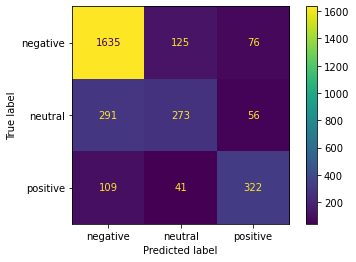

In [36]:
print("NB MODEL")
eval(nb, X_test_count)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1836
     neutral       0.60      0.56      0.58       620
    positive       0.72      0.69      0.70       472

    accuracy                           0.77      2928
   macro avg       0.72      0.71      0.71      2928
weighted avg       0.77      0.77      0.77      2928



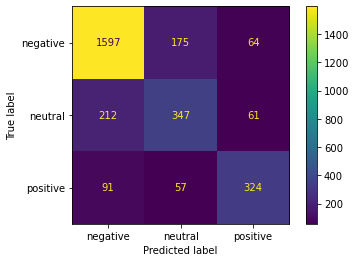

In [38]:
print("LOG MODEL")
eval(log, X_test_count)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_test_count)

### SVM

In [39]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

SVM MODEL
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1836
     neutral       0.60      0.54      0.57       620
    positive       0.71      0.70      0.71       472

    accuracy                           0.78      2928
   macro avg       0.72      0.70      0.71      2928
weighted avg       0.77      0.78      0.77      2928



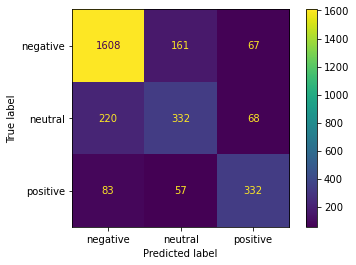

In [40]:
print("SVM MODEL")
eval(svc, X_test_count)

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=8)

KNN MODEL
              precision    recall  f1-score   support

    negative       0.82      0.50      0.62      1836
     neutral       0.31      0.71      0.43       620
    positive       0.64      0.52      0.58       472

    accuracy                           0.55      2928
   macro avg       0.59      0.58      0.54      2928
weighted avg       0.69      0.55      0.57      2928



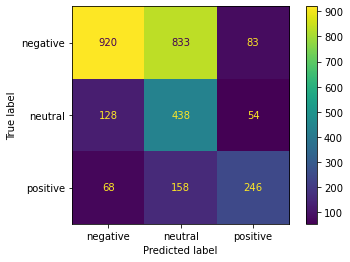

In [42]:
print("KNN MODEL")
eval(knn, X_test_count)

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84      1836
     neutral       0.58      0.48      0.53       620
    positive       0.68      0.64      0.66       472

    accuracy                           0.75      2928
   macro avg       0.69      0.66      0.68      2928
weighted avg       0.74      0.75      0.75      2928



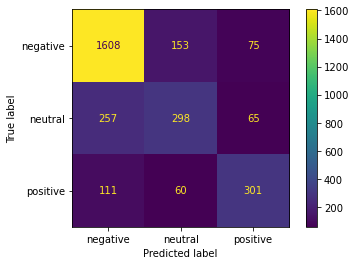

In [44]:
print("RF MODEL")
eval(rf, X_test_count)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.82      0.86      0.84      1836
     neutral       0.58      0.50      0.54       620
    positive       0.65      0.65      0.65       472

    accuracy                           0.75      2928
   macro avg       0.69      0.67      0.68      2928
weighted avg       0.75      0.75      0.75      2928



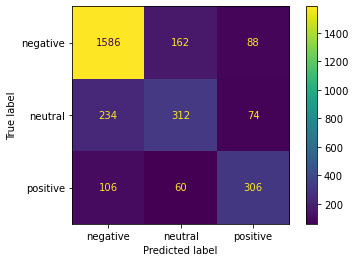

In [46]:
print("RF MODEL BALANCED")
eval(rf, X_test_count)

### Ada Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

ADA MODEL
              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      1836
     neutral       0.55      0.56      0.55       620
    positive       0.68      0.64      0.66       472

    accuracy                           0.75      2928
   macro avg       0.69      0.68      0.68      2928
weighted avg       0.75      0.75      0.75      2928



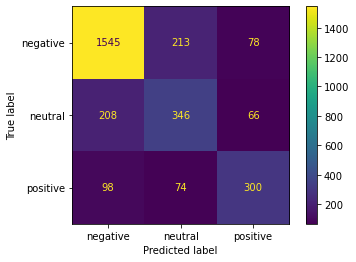

In [48]:
print("ADA MODEL")
eval(ada, X_test_count)

### TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [51]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32202387, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,aadv,aadvantage,aafail,abandoned,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abused,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodated,...,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,younger,youre,yousuck,youth,youve,yr,yuma,yup,yvonne,yvr,yyz,zero,zone,zurich
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.344392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Comparisons  TF-IDF

### Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.76      0.95      0.85      1836
     neutral       0.68      0.33      0.44       620
    positive       0.78      0.59      0.67       472

    accuracy                           0.76      2928
   macro avg       0.74      0.62      0.65      2928
weighted avg       0.75      0.76      0.73      2928



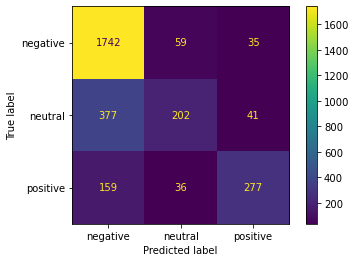

In [54]:
print("NB MODEL")
eval(nb, X_test_count)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.81      0.90      0.86      1836
     neutral       0.69      0.39      0.50       620
    positive       0.65      0.73      0.69       472

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.68      2928
weighted avg       0.76      0.77      0.75      2928



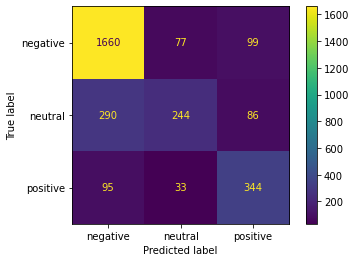

In [56]:
print("LOG MODEL")
eval(log, X_test_count)

In [57]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      1836
     neutral       0.63      0.47      0.54       620
    positive       0.57      0.78      0.66       472

    accuracy                           0.76      2928
   macro avg       0.69      0.70      0.68      2928
weighted avg       0.76      0.76      0.75      2928



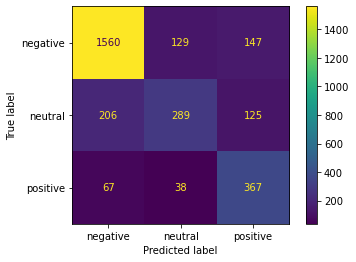

In [58]:
print("LOG MODEL BALANCED")
eval(log, X_test_count)

### SVM

In [59]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)
# Vectorizer kelimeleri öklid e göre transform ettiği için 

LinearSVC()

SVM MODEL
              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1836
     neutral       0.69      0.37      0.48       620
    positive       0.64      0.76      0.69       472

    accuracy                           0.77      2928
   macro avg       0.71      0.68      0.68      2928
weighted avg       0.76      0.77      0.75      2928



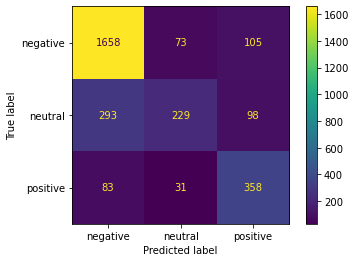

In [60]:
print("SVM MODEL")
eval(svc, X_test_count)

### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier()

KNN MODEL
              precision    recall  f1-score   support

    negative       0.79      0.70      0.74      1836
     neutral       0.36      0.52      0.42       620
    positive       0.63      0.57      0.60       472

    accuracy                           0.64      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.67      0.64      0.65      2928



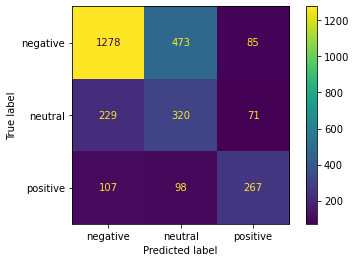

In [62]:
print("KNN MODEL")
eval(knn, X_test_count)

### RandomForest

In [63]:
rf = RandomForestClassifier(1000, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

    negative       0.84      0.77      0.80      1836
     neutral       0.46      0.58      0.51       620
    positive       0.65      0.65      0.65       472

    accuracy                           0.71      2928
   macro avg       0.65      0.67      0.65      2928
weighted avg       0.73      0.71      0.72      2928



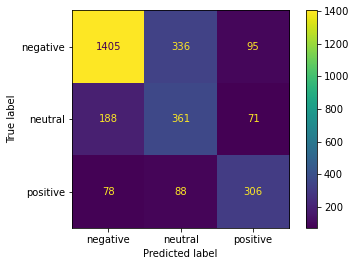

In [64]:
print("RF MODEL")
eval(rf, X_test_count)

In [65]:
rf = RandomForestClassifier(1000, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.82      0.83      0.83      1836
     neutral       0.54      0.48      0.51       620
    positive       0.61      0.67      0.64       472

    accuracy                           0.73      2928
   macro avg       0.66      0.66      0.66      2928
weighted avg       0.73      0.73      0.73      2928



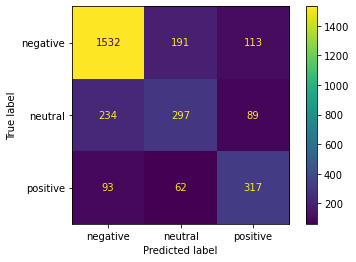

In [66]:
print("RF MODEL BALANCED")
eval(rf, X_test_count)

### Ada Boost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

ADA MODEL
              precision    recall  f1-score   support

    negative       0.84      0.69      0.76      1836
     neutral       0.47      0.50      0.49       620
    positive       0.45      0.74      0.56       472

    accuracy                           0.66      2928
   macro avg       0.59      0.64      0.60      2928
weighted avg       0.70      0.66      0.67      2928



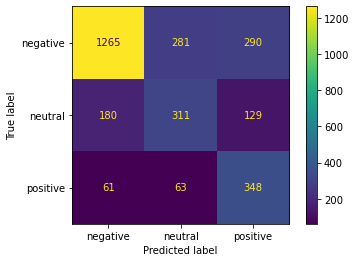

In [68]:
print("ADA MODEL")
eval(ada, X_test_count)

### Cross Val

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average='weighted', labels=["negative"]),
                 'recall-neg': make_scorer(recall_score, average='weighted', labels = ["negative"]),
                 'f1-neg': make_scorer(f1_score, average='weighted', labels = ["negative"]),
                 
                 'precision-neutral': make_scorer(precision_score, average='weighted', labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average='weighted', labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average='weighted', labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average='weighted', labels=["positive"]),
                 'recall-pos': make_scorer(recall_score, average='weighted', labels = ["positive"]),
                 'f1-pos': make_scorer(f1_score, average='weighted', labels = ["positive"]),
                 }
for i, j in custom_scorer.items():
    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j, n_jobs = -1).mean()
    print(f" {i} score : {scores}\n")

 accuracy score : 0.7813345409396013

 precision-neg score : 0.8053068513481658

 recall-neg score : 0.9342145359506201

 f1-neg score : 0.8649506501116455

 precision-neutral score : 0.6570451244141358

 recall-neutral score : 0.4852651168865091

 f1-neutral score : 0.5577802517741082

 precision-pos score : 0.803425084548793

 recall-pos score : 0.5758702311333891

 f1-pos score : 0.6699202480714954



LOG MODEL
              precision    recall  f1-score   support

    negative       0.81      0.90      0.86      1836
     neutral       0.69      0.39      0.50       620
    positive       0.65      0.73      0.69       472

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.68      2928
weighted avg       0.76      0.77      0.75      2928



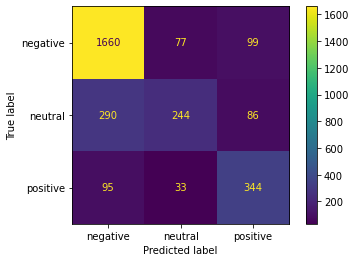

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)
print("LOG MODEL")
eval(log, X_test_count)

### For New Tweets, Prediction With Pipeline


In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression(max_iter=1000))])

In [73]:
pipe.fit(df["text"], df["airline_sentiment"])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(max_iter=1000))])

In [74]:
tweet = "very good flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [75]:
tweet = "it was not the best flight i have ever been"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [76]:
tweet = "I arrived just in time"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [77]:
tweet = "ok flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['neutral'], dtype=object)

## WordCloud - Repetition of Words

### Collect Words

In [78]:
tweets = df2["text"]
tweets 

0                                                     said
1                              plus youve added commercial
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious face amp lit...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638      money change flight dont answer suggestion make
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [79]:
all_words = " ".join(tweets)

In [80]:
all_words[:100]

'said plus youve added commercial didnt today must mean need take another trip really aggressive blas'

### Create Word Cloud

In [81]:
#!pip install wordcloud

In [82]:
from wordcloud import WordCloud

In [83]:
wordcloud=WordCloud(background_color='white',max_words=200, stopwords=stop_words)
# max_words=200 resimde gösterilecek kelime sayısını belirliyor

In [84]:
wordcloud.generate(all_words)

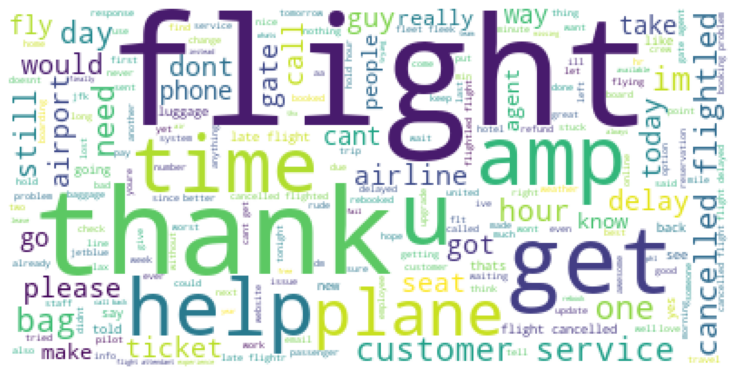

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

### Counting words

In [86]:
counter = Counter(word_tokenize(all_words))

In [87]:
counter.most_common()

[('flight', 4491),
 ('get', 1366),
 ('hour', 1116),
 ('thanks', 1062),
 ('cancelled', 1055),
 ('u', 982),
 ('service', 966),
 ('time', 926),
 ('customer', 913),
 ('help', 843),
 ('bag', 737),
 ('im', 735),
 ('plane', 694),
 ('amp', 642),
 ('need', 629),
 ('hold', 629),
 ('thank', 598),
 ('one', 573),
 ('cant', 566),
 ('still', 563),
 ('call', 547),
 ('would', 546),
 ('please', 544),
 ('airline', 540),
 ('gate', 527),
 ('day', 527),
 ('delayed', 521),
 ('back', 510),
 ('flightled', 496),
 ('dont', 484),
 ('got', 477),
 ('seat', 467),
 ('phone', 441),
 ('like', 425),
 ('late', 424),
 ('delay', 418),
 ('guy', 416),
 ('today', 408),
 ('agent', 407),
 ('fly', 377),
 ('know', 372),
 ('make', 372),
 ('ticket', 368),
 ('waiting', 359),
 ('change', 356),
 ('airport', 352),
 ('way', 350),
 ('trying', 347),
 ('minute', 331),
 ('great', 330),
 ('ive', 325),
 ('go', 324),
 ('going', 322),
 ('wait', 318),
 ('never', 314),
 ('flying', 307),
 ('last', 302),
 ('problem', 299),
 ('take', 294),
 ('tomorr